In [4]:
import IPython.core.display as di

di.display_html('<script>jQuery(function() {if(jQuery("body.notebook_app").length==0) {jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# The Bernoulli Random Variable

## Prerequisits

To understand the material in these notes you need to know something about the sigma notation for describing summations.
It is also useful to learn about piecewise functions and the Heavyside step function in particular.  You can find information on these topics in these places.

- Sigma notation: https://www.khanacademy.org/math/precalculus/seq\_induction/geometric-sequence-series/v/sigma-notation-sum
- Piecewise functions: https://en.wikipedia.org/wiki/Piecewise
- Heavyside step function: https://en.wikipedia.org/wiki/Heaviside\_step\_function

## Introduction

The Bernoulli random variable is used to describe the results from experiments that have two possible outcomes.
As an example the Bernoulli random variable can be used to describe the outcome of flipping a coin.  Oftentimes
we use a Bernoulli random variable to describe whether a particular thing happened when we did our experient. For 
example, we can describe the outcome of a test to test for a particular disease using the Bernoulli random variable, $X$.  This random vairable will have $X=1$ if the person has the disease or $X=0$ if the person is healthy.  We often call these sort of true/false experiments trials and thus say that the parameter, $p$, for the Bernoulli random variable gives us the probablity that a particular trial will be successful.

## Probability mass function

The Bernoulli random variable can have a value of either 0 or 1. It is thus a discrete random variable as it only takes on
integer values.  Because it is a discrete random variable it has a probablity mass function rather than a probablity density function.  This probablity mass is as follows:

$$
P(X=x) = 
\begin{cases}
 (1-p) & \textrm{if} \quad x=0 \\
 p & \textrm{if} \quad x=1 \\
 0 & \textrm{otherwise}
\end{cases}
$$

This form comes about because we want the probablity of sucess ($X=1$) to be equal to $p$.  Sucess ($X=1$) and failure ($X=0$) are mutually exclusive outcomes of this experiment and the only possible outcomes.  Having $X>1$ is impossible and thus the probablity $P(X>1)=0$. Becaue our random variable must be normalized, $\sum_{i=0}^\infty P(X=i) = 1$, we therefore arrive at


$$
1 = P(X=0) + P(X=1) = 1 = P(X=0) + p \qquad \rightarrow  \qquad P(X=0) = 1-p
$$

## Expectation

The expectation, $\mathbb{E}(X)$, of the Bernoulli random variable, $X$, with parameter $p$ is:
$$
\mathbb{E}(X) = p
$$
We can prove this by remembering that the expectation of a discrete random variable is equal to:
$$
\mathbb{E}(X) = \sum_{i=0}^\infty x_i P(X=x_i)
$$
When we substitute the probability mass function for a Bernoulli random variable into this expression we get:
$$
\mathbb{E}(X) = 0 \times (1-p) + 1 \times p = p
$$

## Sample mean


To create the figure below I generated a 500 bernoulli random variables, $\{X_i\}$, with parameter $p=0.2$.  I then computed the sample mean using the following expression:

$$
\mu_n = \frac{1}{n} \sum_{i=1}^n X_i
$$

with values of $n$ ranging from 1 to 500.  $\mu_n$ is shown on the $y$ axis of the graph below while $n$ is shown on the $x$ axis.  As you can see the sample mean $\mu_n$ fluctuates initially when $n$ is small.  When $n$ is large, however, the value of the sample mean settles down to a value that is close to the expectation of the random variable.  This behavior accords with the predictions of the law of large numbers and the central limit theorem.  I have deliberately hidden the code that I have used to generate this figure in this report.  In your report you should generate a similar figure and you should <b> show the code that you used to generate the figure </b>.  

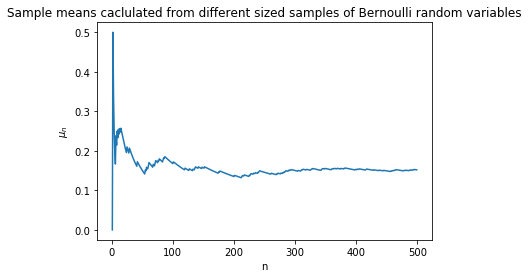

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
import random
import math

def bernoulli() :
    rr = random.uniform(0,1)
    if rr<0.2 :
        return 1
    return 0

tot, rsum, n, rmeans = 0,0, [], []
for i in range(1,500) :
    tot += 1
    rsum += bernoulli()
    n.append(tot) 
    rmeans.append( rsum / tot )
    
plt.plot( n, rvars )
plt.title("Sample means caclulated from different sized samples of Bernoulli random variables")
plt.xlabel("n")
plt.ylabel("$\mu_n$")
plt.show()

## Variance

The variance, $\textrm{var}(X)$, of the Bernoulli random variable, $X$, with parameter $p$ is:

$$
\textrm{var}(X) = p(1-p)
$$

We prove this by remembering that the variance of a random variable is equal to:

$$
\textrm{var}(X) = \mathbb{E}(X^2) - [\mathbb{E}(X)]^2
$$

We have already calculated the expectation $\mathbb{E}(X)$ above and thus need only calculate the expectation
of a function of the random vairable $\mathbb{E}(X^2)$.  For a discrete random variable we do this as follows:

$$
\mathbb{E}(X^2) = \sum_{i=0}^\infty x_i^2 P(X=x_i)
$$

When we do this for the Bernoulli random variable we find that:

$$
\mathbb{E}(X^2) = 0^2 \times ( 1-p ) + 1^2 \times p = p
$$

Substituting this and $\mathbb{E}(X)$ into our formula for the variance gives:

$$
\textrm{var}(X) = \mathbb{E}(X^2) - [\mathbb{E}(X)]^2 = p - p^2 = p(1-p)
$$

## Sample variance

To create the figure below I generated a 500 bernoulli random variables, $\{X_i\}$, with parameter $p=0.2$.  I then computed the sample variance using the following expression:

$$
\sigma^2_n = \frac{1}{n-1} \sum_{i=1}^n (X_i - \mu_n)^2
$$

with values of $n$ ranging from 2 to 500.  $\sigma_n^2$ is shown on the $y$ axis of the graph below while $n$ is shown on the $x$ axis.  As you can see the sample variance $\sigma_n^2$ is initially large when $n$ is small.  When $n$ is large, however, the value of the sample variance settles down to a value that is close to the variance of the random variable.  This behavior <b> does </b> accord with the predictions of the central limit theorem.  The central limit theorem predicts, after all, that the sample variance for a sample mean computed from $n$ variables decreases as you increase the number of samples from which the mean is computed.  When we take the variance of a distribution of random variables that are all of the same type we are just taking an expectation so the value should converge to the variance for the distribution.  I have deliberately hidden the code that I have used to generate this figure in this report.  In your report you should generate a similar figure and you should <b> show the code that you used to generate the figure </b>.

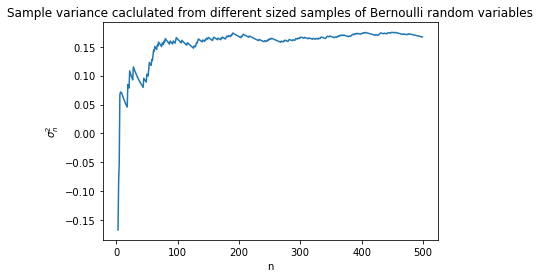

In [18]:
tot, rsum, rsum2, n, rvars = 2, bernoulli()+bernoulli(), 0, [], []
for i in range(3,500) :
    tot += 1
    var = bernoulli()
    rsum += var
    rsum2 += var*var
    n.append(tot)
    mean = rsum / tot
    rvars.append( (tot /(tot - 1) )*(rsum2/tot - mean*mean)   )
    
plt.plot( n, rvars )
plt.title("Sample variance caclulated from different sized samples of Bernoulli random variables")
plt.xlabel("n")
plt.ylabel("$\sigma_n^2$")
plt.show()

# Calculating the median and percentiles

The cell below generates a sample of 501 bernoulli random variables, stores these values in a list, stores the list and then calculates the median of the distribution and the 10th and 90th percentiles for the distribution.  I have deliberately hidden the code that I have used to generate these numbers in this report.  In your report you should <b> show the code that you used to generate these summary statistics </b>.  

In [26]:
samples = []
for i in range(501) : samples.append( bernoulli() )
    
def percentile( v, ss ) : 
    return ss[ math.floor( v * len(ss) ) ]

samples.sort()
print( "MEDIAN ", samples[250] )
print( "10th Percentile ", percentile(0.1, samples), " 90th Percentile ", percentile(0.9, samples) )

MEDIAN  0
10th Percentile  0  90th Percentile  1


## Estimating histograms

To create the figure below I generated 500 Bernoulli random variables, $\{X_i\}$, with parameter $p=0.7$.  I then computed the two components of the histogram using:

$$
h_0 = 1 - \frac{1}{n} \sum_{i=1}^n X_i \qquad \textrm{and} \qquad h_1 = \frac{1}{n} \sum_{i=1}^n X_i
$$

in these expressions $n=500$.  The figure I obtain for the histogram is shown below.  The histogram provides an estimate of the probability mass function for the random vairable and as you can see the heights of the bars of the histogram below are approximately 0.3 and 0.7 respectively.  This is in accordance with what would be expected given the probability mass function for this random variable.  I have hidden the code used to generate this figure once more.  In your report you should generate a figure like this for your particular random variable and <b> you should show the code that was used to generate the figure. </b>

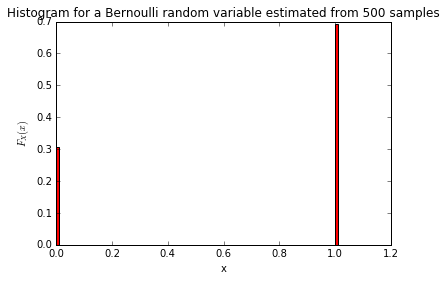

In [2]:
def bernoulli() :
    rr = random.uniform(0,1)
    if rr<0.7 :
        return 1
    return 0

tot, rsum = 0,0
for i in range(1,500) :
    tot += 1
    rsum += bernoulli()
    
bins, weights = [0, 1], [ 1 - rsum/tot, rsum/tot ]

fig, ax = plt.subplots()
ax.set_title('Histogram for a Bernoulli random variable estimated from 500 samples')
ax.set_xlabel('x')
ax.set_ylabel('$F_X(x)$')
rects1 = ax.bar(bins, weights, [0.01,0.01], color='r')
plt.show()

## Bibliography

In compiling the above report I used the following resources:


- https://en.wikipedia.org/wiki/Bernoulli\_distribution
- SOR3012 notes chapter 4